### **PROJECT 2 PROPOSAL LEVEL 1**


**Idea: Customer Segmentation Analysis**


 **Description:**


The aim of this data analytics project is to perform customer segmentation analysis for an e-commerce company. By analyzing customer behavior and purchase patterns, the goal is to group customers into distinct segments. This segmentation can inform targeted marketing strategies, improve customer satisfaction and enhance overall business strategies.


 **Dataset:-** https://www.kaggle.com/datasets/jackdaoud/marketing-data?select=ifood_df.csv


 **Key Concepts and Challenges:**


1. Data Collection: Obtain a dataset containing customer information, purchase history, and relevant data.


2. Data Exploration and Cleaning: Explore the dataset, understand its structure, and handle any missing or inconsistent data.


3. Descriptive Statistics: Calculate key metrics such as average purchase value, frequency of purchases, etc.


4. Customer Segmentation: Utilize clustering algorithms (e.g., K-means) to segment customers based on behavior and purchase patterns.


5. Visualization: Create visualizations (e.g., scatter plots, bar charts) to illustrate customer segments.


6. Insights and Recommendations: Analyze characteristics of each segment and provide insights.

In [1]:
# Install if needed:
# pip install pandas matplotlib seaborn scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Load the ifood_df.csv dataset 
df = pd.read_csv("ifood_df.csv") 

In [3]:
# Explore and Understand Dataset
print(" Dataset Shape:", df.shape)
print(" Columns:\n", df.columns)
print("\n Missing Values:\n", df.isnull().sum())
print("\n Data Sample:\n", df.head())

 Dataset Shape: (2205, 39)
 Columns:
 Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

 Missing Values:
 Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFis

In [4]:
# Data Cleaning
# Drop CustomerID column if it exists
if 'ID' in df.columns:
    df.drop('ID', axis=1, inplace=True)

# Fill missing values if any (you can customize this)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Select numeric columns for segmentation
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_cols]

In [5]:
# Descriptive Statistics
print("\n Descriptive Statistics:\n", df_numeric.describe())

# Average purchase value and frequency
if 'Income' in df.columns and 'NumWebPurchases' in df.columns:
    avg_income = df['Income'].mean()
    avg_web_purchases = df['NumWebPurchases'].mean()
    print(f"\n Avg Income: ${avg_income:.2f}")
    print(f" Avg Web Purchases: {avg_web_purchases:.2f}")


 Descriptive Statistics:
               Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.000000      2205.000000       2205.000000   
mean     26.403175       165.312018        37.756463         27.128345   
std      39.784484       217.784507        54.824635         41.13

In [6]:
# Data Preprocessing for Clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

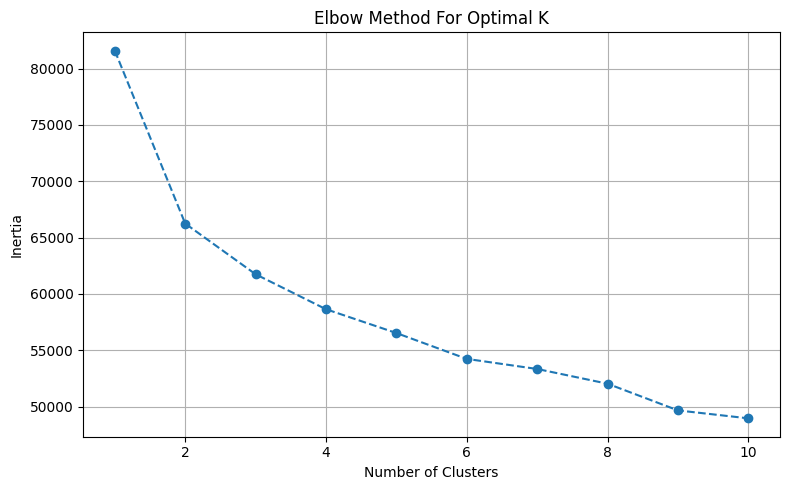

In [7]:
# K-Means Clustering
# Find optimal number of clusters (Elbow method)
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(df_scaled)
    inertia.append(km.inertia_)

# Elbow plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
# From elbow plot, choose k 
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

In [9]:
print(" Cluster assignments (first 10 rows):")
print(df[['Cluster']].head(10))

 Cluster assignments (first 10 rows):
   Cluster
0        3
1        0
2        3
3        0
4        2
5        2
6        2
7        0
8        0
9        0


In [10]:
print(" Number of customers in each cluster:")
print(df['Cluster'].value_counts())

 Number of customers in each cluster:
Cluster
0    1032
2     565
3     433
1     175
Name: count, dtype: int64


In [11]:
print(" Cluster profile summary (mean of numerical features):")
print(df.groupby('Cluster').mean(numeric_only=True))

 Cluster profile summary (mean of numerical features):
               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                       
0        34509.286822  0.786822  0.445736  49.227713   41.962209   5.208333   
1        81760.000000  0.051429  0.142857  48.691429  892.080000  54.011429   
2        57363.890265  0.233628  0.927434  47.734513  447.380531  20.552212   
3        72735.651270  0.050808  0.249423  50.279446  514.789838  73.394919   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0              23.923450         8.002907          5.354651     15.934109   
1             480.108571        79.942857         62.845714     76.400000   
2             129.366372        26.755752         21.067257     59.306195   
3             421.969977       105.974596         72.496536     78.115473   

       

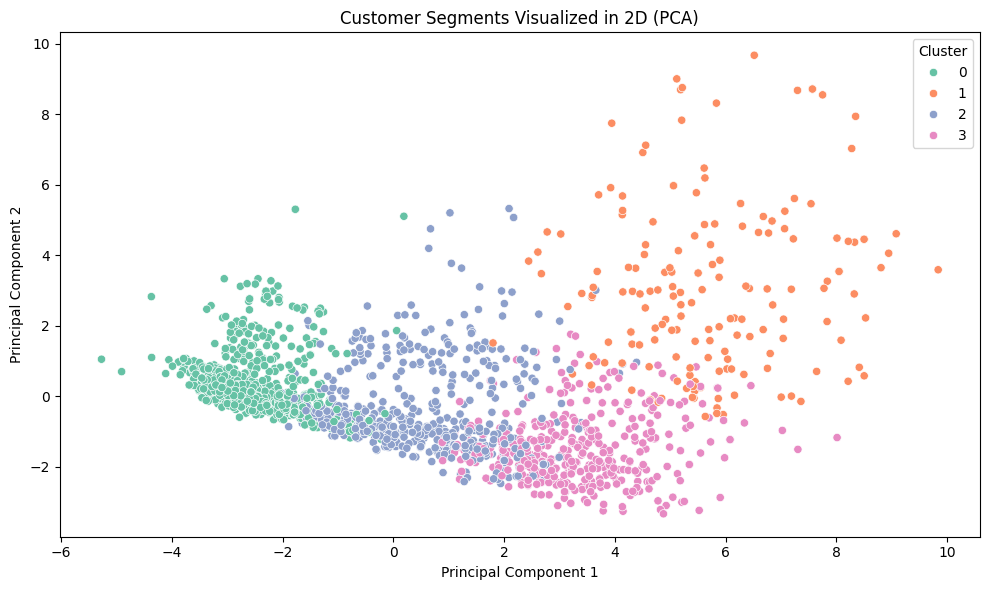

In [12]:
# Visualize the Clusters (PCA for 2D)
pca = PCA(n_components=2)
components = pca.fit_transform(df_scaled)
df['PCA1'] = components[:, 0]
df['PCA2'] = components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('Customer Segments Visualized in 2D (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [13]:
# Insights and Recommendations
print("\n Cluster Sizes:\n", df['Cluster'].value_counts())

#  Average values per cluster
cluster_profile = df.groupby('Cluster')[numeric_cols].mean()
print("\n Cluster Profiles:\n", cluster_profile)


 Cluster Sizes:
 Cluster
0    1032
2     565
3     433
1     175
Name: count, dtype: int64

 Cluster Profiles:
                Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                       
0        34509.286822  0.786822  0.445736  49.227713   41.962209   5.208333   
1        81760.000000  0.051429  0.142857  48.691429  892.080000  54.011429   
2        57363.890265  0.233628  0.927434  47.734513  447.380531  20.552212   
3        72735.651270  0.050808  0.249423  50.279446  514.789838  73.394919   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0              23.923450         8.002907          5.354651     15.934109   
1             480.108571        79.942857         62.845714     76.400000   
2             129.366372        26.755752         21.067257     59.306195   
3             421.969977   

## **Recommendations**


1. Segmentation revealed distinct customer groups based on income, purchases, and response to campaigns.


2. One cluster may represent high-income, high-purchase customers — ideal for loyalty programs.


3. Another cluster may consist of low-engagement users — targeted promotions may help.


4. Segmenting users allows for personalized marketing and resource allocation.